# Customer Segmentation & Clustering

In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

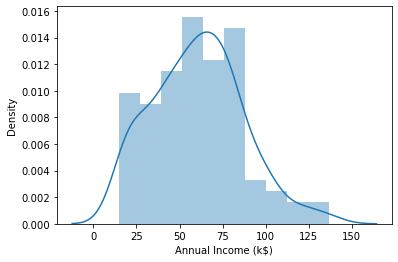

In [14]:
sns.distplot(df['Annual Income (k$)']);


In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

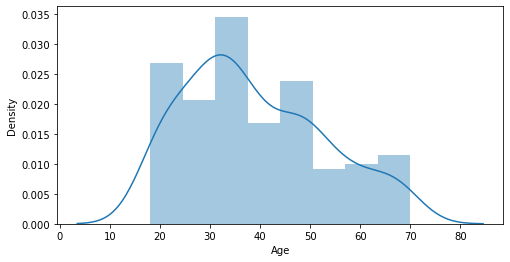

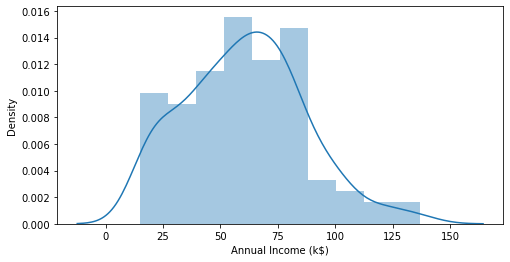

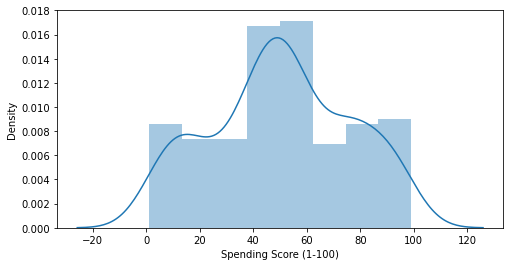

In [17]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(8,4))
    sns.distplot(df[i]);

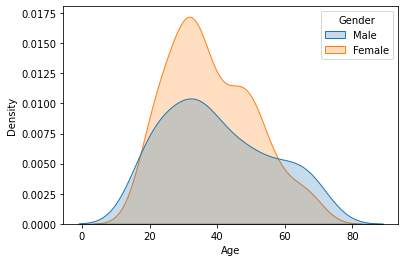

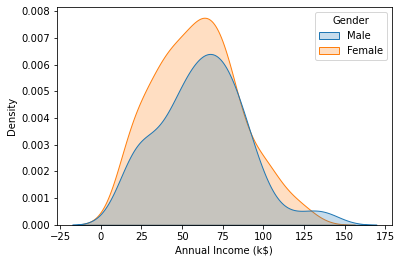

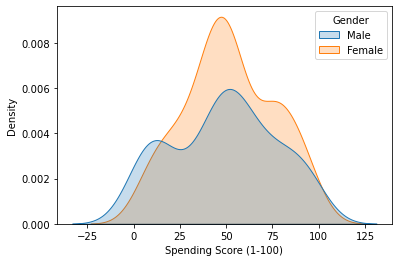

In [20]:
for i in columns:
    
    plt.figure()
    sns.kdeplot(df[i],fill=True,hue=df['Gender']);

In [21]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivarient analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

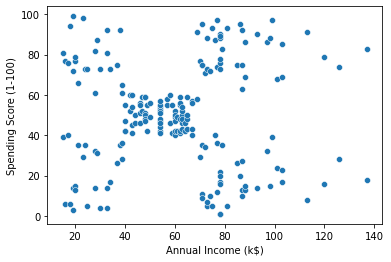

In [23]:
sns.scatterplot(data=df,x=df['Annual Income (k$)'], y= df['Spending Score (1-100)'])

In [26]:
df=df.drop('CustomerID',axis=1)

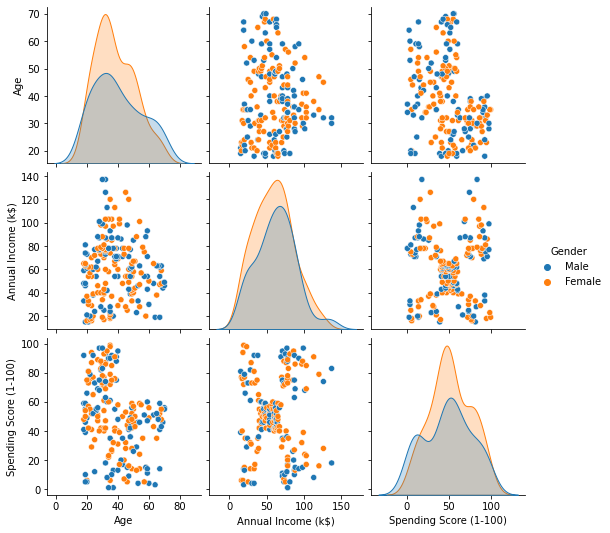

In [28]:
sns.pairplot(df,hue='Gender')

In [31]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [32]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

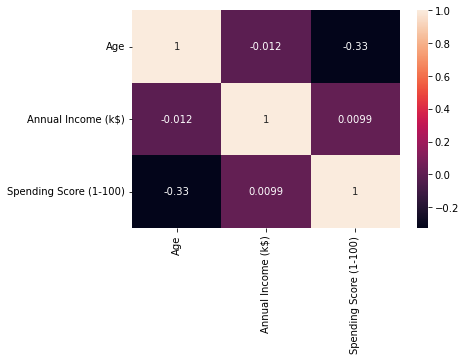

In [35]:
sns.heatmap(df.corr(),annot=True)

In [38]:
from sklearn.cluster import KMeans

#  Clustring - Uni, Bi and Multivariate

In [87]:
clust1 = KMeans(n_clusters=3)

In [88]:
clust1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [89]:
clust1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [90]:
df['income cluster'] = clust1.labels_

In [91]:
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,1
198,Male,32,137,18,1
199,Male,30,137,83,1


In [92]:
df['income cluster'].value_counts()

0    92
2    72
1    36
Name: income cluster, dtype: int64

In [93]:
clust1.inertia_ #distance between the centroids

23528.152173913055

In [94]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [95]:
inertia_score

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5081.484660267269,
 3962.5679936006018,
 2831.2960317460324,
 2171.472222222222,
 1734.1677489177487]

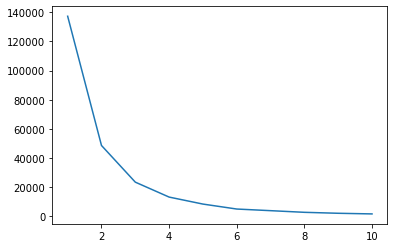

In [96]:
plt.plot(range(1,11),inertia_score);

In [97]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster'],
      dtype='object')

In [98]:
df.groupby('income cluster')['Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


In [99]:
# bivariate clustering  

In [121]:
clust2 = KMeans(n_clusters=5)
clust2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['spending and income cluster'] = clust2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,2
2,Female,20,16,6,2,4
3,Female,23,16,77,2,2
4,Female,31,17,40,2,4


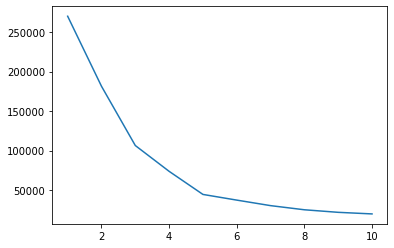

In [122]:
inertia_score2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score2.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_score2);

In [129]:
clust2.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [132]:
centers = pd.DataFrame(clust2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,86.538462,82.128205
1,55.296296,49.518519
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


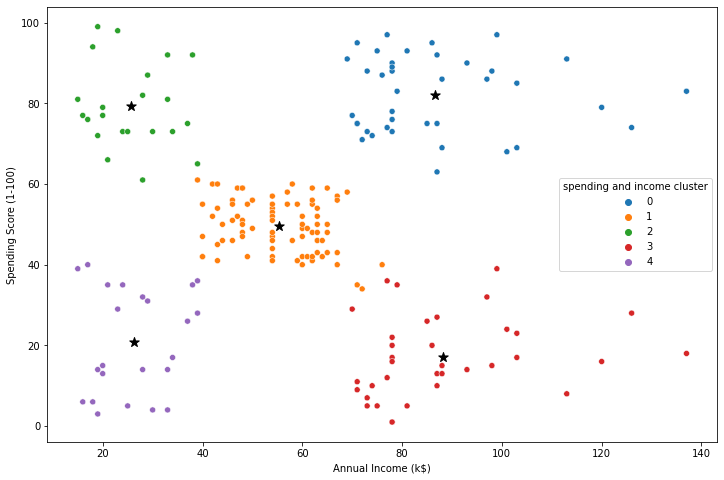

In [134]:
plt.figure(figsize=(12,8))
plt.scatter(x= centers['x'], y = centers['y'],s=100,c='black',marker= '*')
sns.scatterplot(data=df, x= 'Annual Income (k$)', y='Spending Score (1-100)',hue='spending and income cluster',palette='tab10');